## Imports

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint

## Download Data

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


### **Data Augmantaion**

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest'        
)

In [35]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

## Load data

In [36]:

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 8005 images belonging to 2 classes.


In [37]:
class_names = train_generator.class_indices
print(class_names)

{'cats': 0, 'dogs': 1}


In [38]:
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(150, 150),  
    batch_size=32,
    class_mode="binary"
)

Found 2023 images belonging to 2 classes.


In [39]:
train_generator[0][0].shape  

(32, 150, 150, 3)

### Show a sample of random images before training

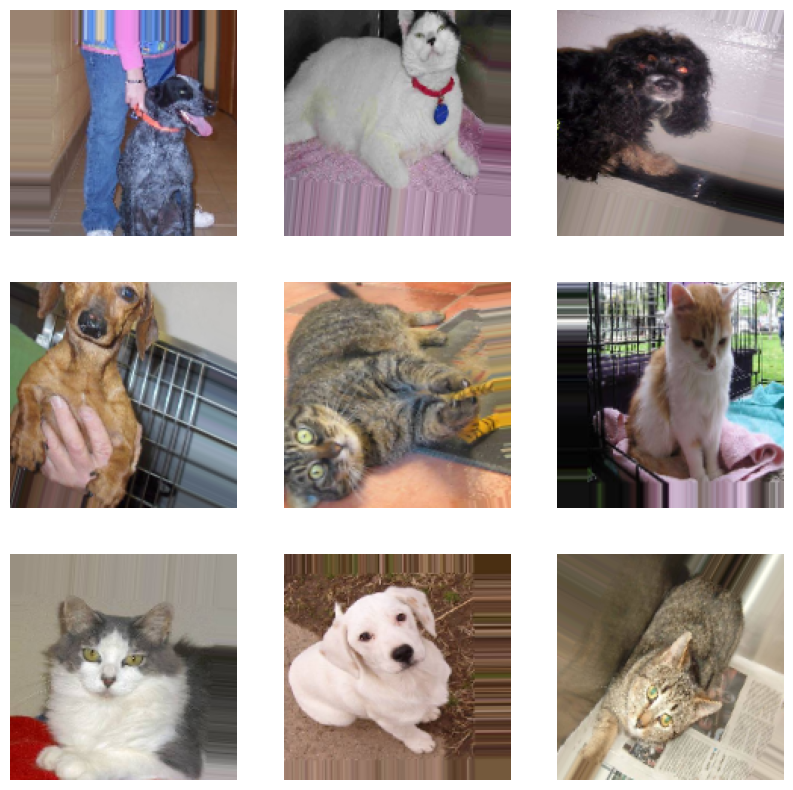

In [40]:

images, labels = next(train_generator)


plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


## CNN Model

In [52]:
model = Sequential()

# layer 1

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01), input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

# layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

# layer 3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

# layer 4
model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

# layer 5
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(1, activation='sigmoid'))


In [54]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 5, 5, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             1

 Total params: 751,681 (2.87 MB)

 Trainable params: 750,465 (2.86 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## saved the best model 

In [56]:
checkpoint_path = "best_model.keras"
# Configure modelCheckpoint to save the model only
#when validation accuracy (val_accuracy) improves.
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)





## Train the model and Add the checkpoint callback

In [57]:

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/20
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.5554 - loss: 4.6366
Epoch 1: val_accuracy improved from -inf to 0.49975, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 239ms/step - accuracy: 0.5554 - loss: 4.6276 - val_accuracy: 0.4998 - val_loss: 1.8552
Epoch 2/20
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6030 - loss: 1.3986
Epoch 2: val_accuracy improved from 0.49975 to 0.60900, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 220ms/step - accuracy: 0.6031 - loss: 1.3969 - val_accuracy: 0.6090 - val_loss: 0.9307
Epoch 3/20
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6255 - loss: 0.8764
Epoch 3: val_accuracy improved from 0.60900 to 0.61542, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 222ms/step - accuracy: 0.6255 - loss: 0.8761 - val_accuracy: 0.6154 - val_loss: 0.7992
Epoch 4/20
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.6483 - loss: 0.7685
Epoch 4: val_accuracy di

## Model evaluate

In [59]:
loss,accuracy=model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7092 - loss: 0.6724
Test Accuracy: 72.32%


## Visualize Accuracy

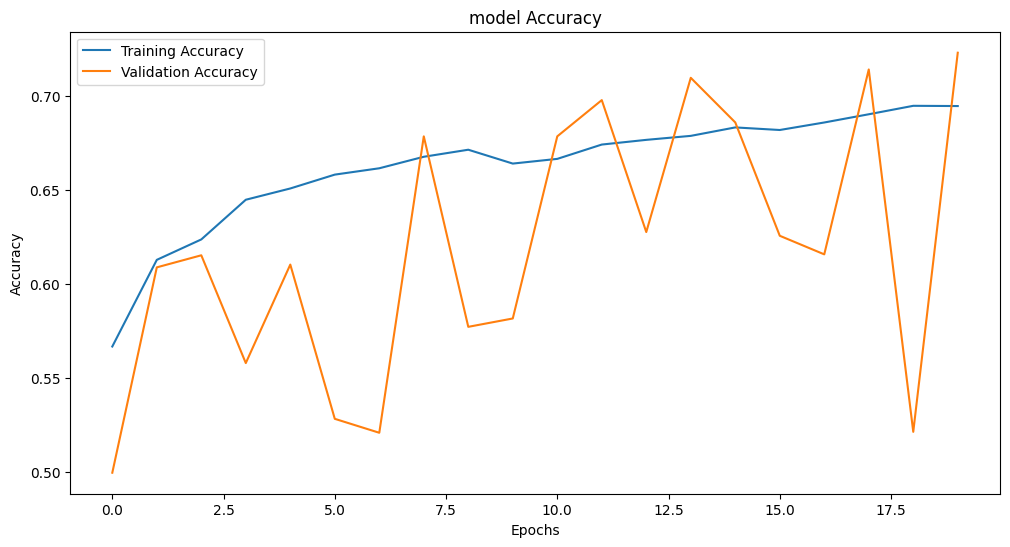

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Visualize Loss

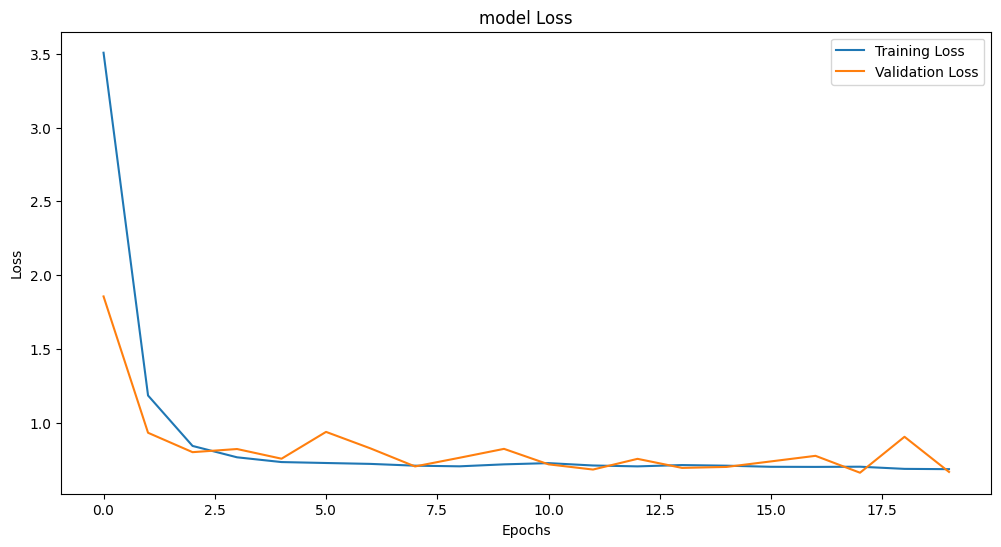

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
